# Plotting the atmospheric neutrino recoil distributions
First relies on generating the recoil distributions by running the file in src/AtmNu_Recoildistribution.py to get the file 'AtmNu_Ar_RecoilDist_3D.txt'. This file is already included in the repository.

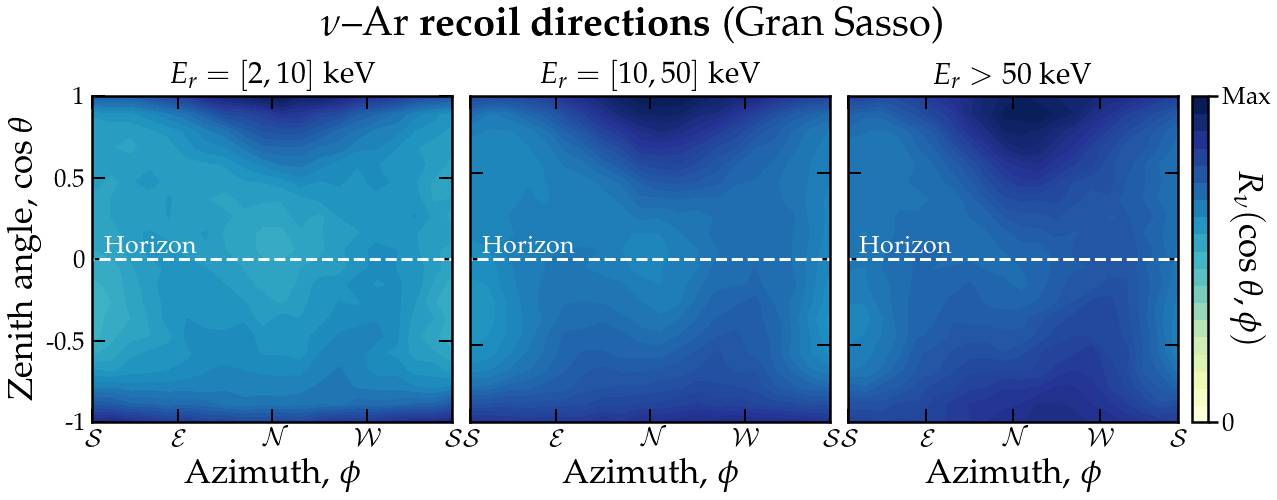

In [1]:
import sys
sys.path.append('../src')
from numpy import *
from numpy import random
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from Params import *
from PlotFuncs import *
import cmocean

recoildat_fname = 'AtmNu_Ar_RecoilDist_3D.txt'

DAT = loadtxt(recoil_dir+recoildat_fname)
nc = int(DAT[0,0])
np = int(DAT[1,0])
E_centers = DAT[2:,0]
ne = size(E_centers)
R_3D = DAT[2:,1:]
C = DAT[0,1:].reshape((nc,np))
P = DAT[1,1:].reshape((nc,np))
cc = C[0,:]
pp = P[:,0]

fig,ax1,ax2,ax3 = MyTriplePlot(size_y=6,wspace=0.05,lfs=35)

pvals = (pp*180/pi)+180

nlevels = 20
#cmap = cmocean.cm.ice
cmap = cm.YlGnBu
norm = colors.BoundaryNorm(boundaries=linspace(0,1,nlevels), ncolors=256)


i1 = argmin(abs(E_centers-10.0))
i2 = argmin(abs(E_centers-50.0))

# Plot:
H1 = sum(R_3D[0:i1,:],0).reshape((nc,np))
H2 = sum(R_3D[i1:i2,:],0).reshape((nc,np))
H3 = sum(R_3D[i2:,:],0).reshape((nc,np))

cnt1 = ax1.contourf(pvals,cc,H1/amax(H1),levels=nlevels,cmap=cmap,vmin=0,vmax=1)
cnt2 = ax2.contourf(pvals,cc,H2/amax(H2),levels=nlevels,cmap=cmap,vmin=0,vmax=1)
im = ax3.pcolormesh(pp,cc,H3/amax(H3),cmap=cmap,vmin=0,vmax=1,norm=norm)
cnt3 = ax3.contourf(pvals,cc,H3/amax(H3),levels=nlevels,cmap=cmap,vmin=0,vmax=1)

# This is the fix for the white lines between contour levels
for c in cnt1.collections:
    c.set_edgecolor("face")
for c in cnt2.collections:
    c.set_edgecolor("face")
for c in cnt3.collections:
    c.set_edgecolor("face")

ax1.set_title(r'$E_r = [2,10]$ keV',fontsize=30)
ax2.set_title(r'$E_r = [10,50]$ keV',fontsize=30)
ax3.set_title(r'$E_r > 50$ keV',fontsize=30)

ax1.set_yticks([cc[0],cc[0]/2.0,0,cc[-1]/2.0,cc[-1]])
ax1.set_yticklabels([-1,-0.5,0,0.5,1])
ax2.set_yticklabels([])
ax3.set_yticklabels([])


phi_ticks = [pvals[0],90,180,270,pvals[-1]]
phi_ticklabels = [r'$\mathcal{S}$',r'$\mathcal{E}$',r'$\mathcal{N}$',r'$\mathcal{W}$',r'$\mathcal{S}$']
ax1.set_ylabel(r'Zenith angle, $\cos{\theta}$')
ax1.set_xlabel(r'Azimuth, $\phi$')
ax2.set_xlabel(r'Azimuth, $\phi$')
ax3.set_xlabel(r'Azimuth, $\phi$')

ax1.set_xticks(phi_ticks)
ax1.set_xticklabels(phi_ticklabels)
ax1.plot([0,360],[0,0],'w--',lw=3)
ax1.text(20,0.03,'Horizon',fontsize=25,color='w',zorder=5)

ax2.set_xticks(phi_ticks)
ax2.set_xticklabels(phi_ticklabels)
ax2.plot([0,360],[0,0],'w--',lw=3)
ax2.text(20,0.03,'Horizon',fontsize=25,color='w',zorder=5)

ax3.set_xticks(phi_ticks)
ax3.set_xticklabels(phi_ticklabels)
ax3.plot([0,360],[0,0],'w--',lw=3)
ax3.text(20,0.03,'Horizon',fontsize=25,color='w',zorder=5)


cb = cbar(im)
cb.set_ticks([0,1])
cb.set_ticklabels([0,'Max'])
cb.ax.set_ylabel(r'$R_\nu(\cos{\theta},\phi)$',rotation=-90,labelpad=-10,fontsize=35)

plt.gcf().text(0.5,1.02,r'$\nu$--Ar {\bf recoil directions} (Gran Sasso)',fontsize=40,horizontalalignment='center')


ax1.set_xlim([pvals[0],pvals[-1]])
ax2.set_xlim([pvals[0],pvals[-1]])
ax3.set_xlim([pvals[0],pvals[-1]])

plt.show()
MySaveFig(fig,"AtmosphericRecoils_costhphi")
